In [37]:
# ある日以降の陽性数に対する死亡数をプロットする
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
regions = {'北海道・東北':['Hokkaido', 'Aomori', 'Akita', 'Iwate', 'Miyagi', 'Yamagata', 'Fukushima'],
           '関東':['Tokyo', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Kanagawa'],
           '北陸・中部':['Niigata', 'Toyama', 'Ishikawa', 'Fukui','Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi'],
           '近畿':['Kyoto', 'Osaka', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama'],
           '中国':['Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi'],
           '四国':['Tokushima', 'Kagawa', 'Ehime', 'Kochi'],
           '九州・沖縄':['Fukuoka', 'Saga', 'Nagasaki', 'Oita', 'Kumamoto', 'Miyazaki', 'Kagoshima', 'Okinawa']}
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省CSVを読込む
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")
# 累積死亡者
total_death = pd.read_csv("https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv")
total_death["Date"] = pd.to_datetime(total_death["Date"])
total_death = total_death.set_index("Date")
new_death = total_death.diff()
new_death.iloc[0] = total_death.iloc[0]
new_death = new_death.astype(int)
nc_since = new_case[::-1].cumsum()[::-1]
nd_since = new_death[::-1].cumsum()[::-1]

In [53]:
CFR = (nd_since/nc_since).rolling(7).mean().dropna()

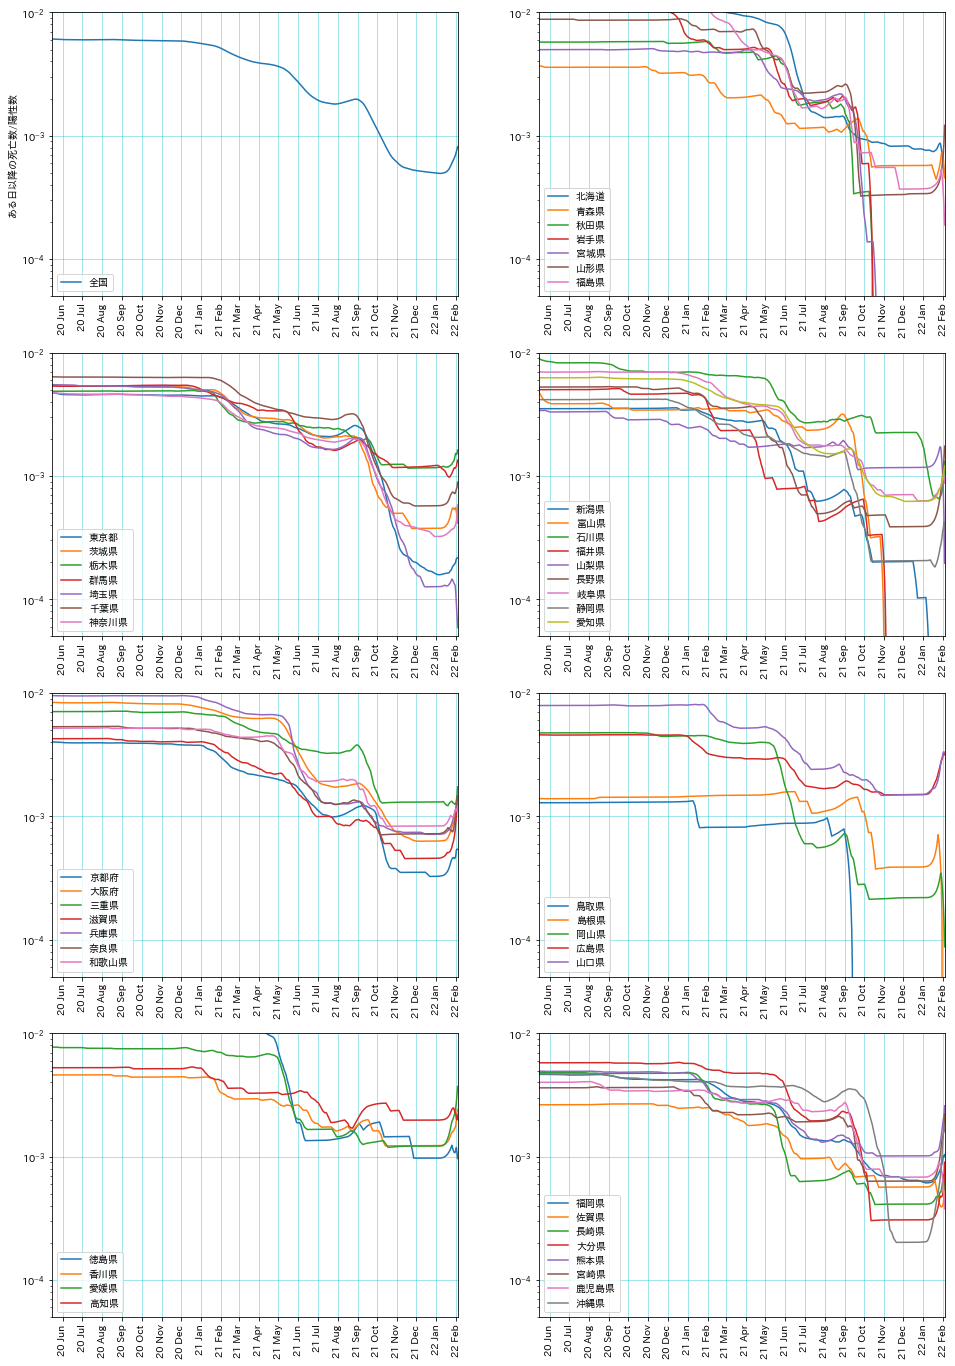

In [62]:
fig, axs = plt.subplots(4,2,figsize=(8*2,6*4))
axs = axs.flatten()
for rid in range(len(regions)+1):
    ax = axs[rid]
    if rid == 0:
        CFR["ALL"].plot(ax=ax, label=JP_pref_of["ALL"])
        ax.set_ylabel("ある日以降の死亡数/陽性数")
    else:
        region_name = list(regions.keys())[rid-1]
        region_df = CFR[regions[region_name]]
        region_df.columns = [JP_pref_of[p] for p in regions[region_name]]
        region_df.plot(ax=ax)
    ax.set_ylim(axs[0].get_ylim())
    ax.set_yticks([5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
    ax.set_yticklabels([5e-5,1e-4,5e-4,1e-3,5e-3,1e-2])
    ax.set_yscale('log')
    ax.set_xlabel("")
    ax.legend(loc='lower left')
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    ax.grid(which='major', axis='y', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)
#plt.savefig('fig/CoVid19-Japan-case_fatility_rate_by_area.png', bbox_inches='tight')
plt.show()